# 1. 데이터 기본 확인 및 결측치 처리

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("train.csv")

# 기본 정보 확인
print(df.info())
print(df.describe())

# 결측치 확인
print("\n[결측치 확인]")
print(df.isnull().sum())

# 결측치 처리 (수치형: 평균, 범주형: 최빈값)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\n결측치 처리 완료")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102676 entries, 0 to 102675
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   영업일자      102676 non-null  object
 1   영업장명_메뉴명  102676 non-null  object
 2   매출수량      102676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB
None
                매출수량
count  102676.000000
mean       10.653083
std        41.887692
min       -80.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      1372.000000

[결측치 확인]
영업일자        0
영업장명_메뉴명    0
매출수량        0
dtype: int64

결측치 처리 완료
영업일자        0
영업장명_메뉴명    0
매출수량        0
dtype: int64


In [2]:
# 영업일자 기준으로 요일 컬럼 추가
df['영업일자'] = pd.to_datetime(df['영업일자'], errors='coerce')
df['요일'] = df['영업일자'].dt.day_name()

print(df[['영업일자', '요일']].head())

        영업일자         요일
0 2023-01-01     Sunday
1 2023-01-02     Monday
2 2023-01-03    Tuesday
3 2023-01-04  Wednesday
4 2023-01-05   Thursday


# 2. EDA

In [3]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (29.9 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126718 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

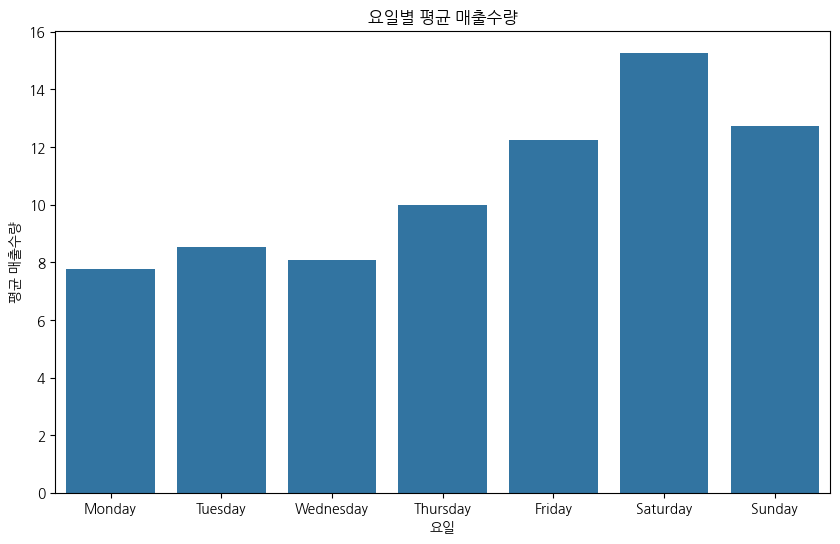

In [4]:
#  EDA: 요일이 포함된 매출 데이터 시각화
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --------------------------------------------
# 1. 데이터 불러오기 및 폰트 설정
# --------------------------------------------
df = pd.read_csv("train.csv")

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# --------------------------------------------
# 2. 날짜형 변환 및 요일/월 파생변수 추가
# --------------------------------------------
df['영업일자'] = pd.to_datetime(df['영업일자'], errors='coerce')
df['요일'] = df['영업일자'].dt.day_name()
df['월'] = df['영업일자'].dt.month

# --------------------------------------------
# (1). 요일별 평균 매출수량
# --------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='요일', y='매출수량', estimator='mean', errorbar=None,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("요일별 평균 매출수량")
plt.xlabel("요일")
plt.ylabel("평균 매출수량")
plt.show()

요일별 평균 매출수량 그래프를 보기위해 데이터에 요일을 추가해서 시각화를 구현했다. 결과, 주중보다 주말(토,일)에 매출이 뚜렷하게 증가하는 패턴을 보인다. 특히 토요일의 평균 매출수량이 가장 높으며, 금요일과 일요일 역시 상대적으로 높은 수준을 유지하고 있다. 이는 주말 소비 활동 증가와 외식·배달 수요가 집중되는 경향을 반영한 결과이다.

반면 월요일부터 수요일까지는 전반적으로 낮은 매출수량을 보여 안정적인 평일 패턴을 형성하고 있다.

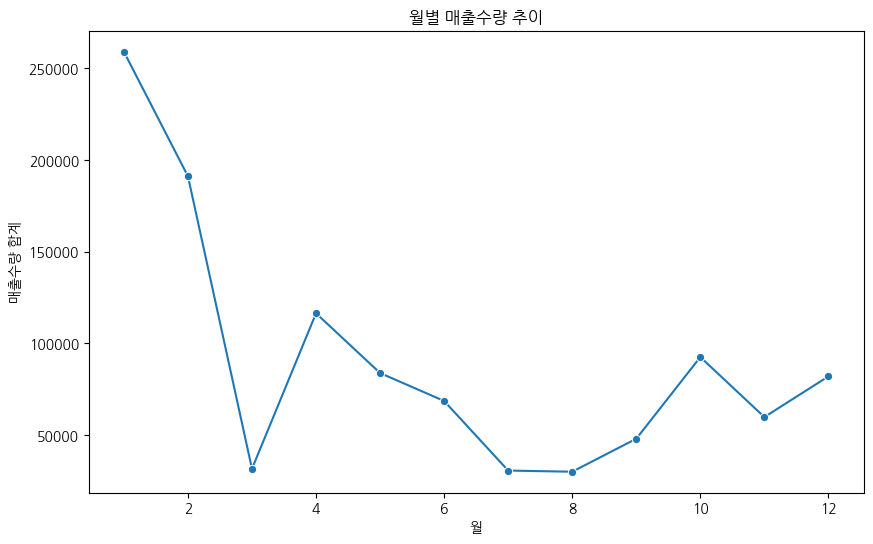

In [5]:
# --------------------------------------------
# (2). 월별 총 매출수량 추이
# --------------------------------------------
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='월', y='매출수량', estimator='sum', errorbar=None, marker='o')
plt.title("월별 매출수량 추이")
plt.xlabel("월")
plt.ylabel("매출수량 합계")
plt.show()


월별 매출수량 추이를 보면 1월과 2월 초반에 매출이 가장 높게 나타난 후, 3월에 급격히 하락하는 양상을 보인다. 이후 4월에 일시적인 반등이 있지만 전반적으로 하반기로 갈수록 매출이 낮은 수준을 유지하고 있다. 이는 연초 소비 집중 및 시즌 요인(명절, 신년 프로모션 등)의 영향을 받은 것으로 해석된다.

하반기에는 9월 이후 소폭의 회복세가 나타나며 10월에 다시 매출이 증가하는 모습이다. 전반적인 흐름을 보면 매출이 특정 시기에 편중되는 경향이 나타난다.

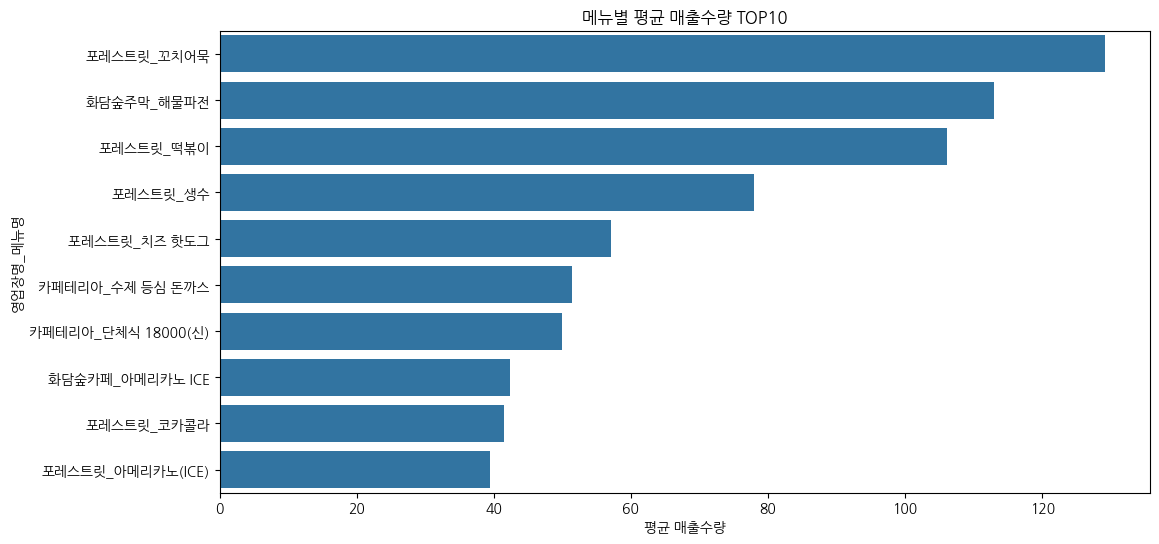

In [6]:
# (3). 메뉴별 평균 매출수량 TOP10
# --------------------------------------------
plt.figure(figsize=(12,6))
top_items = df.groupby('영업장명_메뉴명')['매출수량'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("메뉴별 평균 매출수량 TOP10")
plt.xlabel("평균 매출수량")
plt.ylabel("영업장명_메뉴명")
plt.show()

그래프에서 ‘포레스트릿_고치어묵’, ‘화담숲주막_해물파전’, ‘포레스트릿_떡볶이’ 등 상위 3개 메뉴가 압도적인 판매량을 보이는 점은, 이들이 핵심 수요 메뉴(High-Demand Items) 로 자리 잡고 있음을 의미한다. 해당 메뉴군은 일정한 계절성이나 고정 고객층이 존재할 가능성이 높으므로, 향후 수요예측 모델 구축 시 과거 판매량의 계절 패턴(월별·요일별 변동) 주요 변수로 반영할 필요가 있다.

하위권 메뉴의 경우 상대적으로 변동성이 크거나 특정 이벤트/시간대에 집중되는 특성이 있을 가능성이 있다. 따라서 모델 설계 시 메뉴 카테고리(식사/음료/분식 등)와 시간 변수(월, 요일, 공휴일 여부)를 함께 고려하여, 메뉴별로 예측 민감도가 다른 점을 반영해야 한다.

/tmp/ipython-input-1386125768.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_store, x='매출수량', y='영업장명', palette='Blues_r')


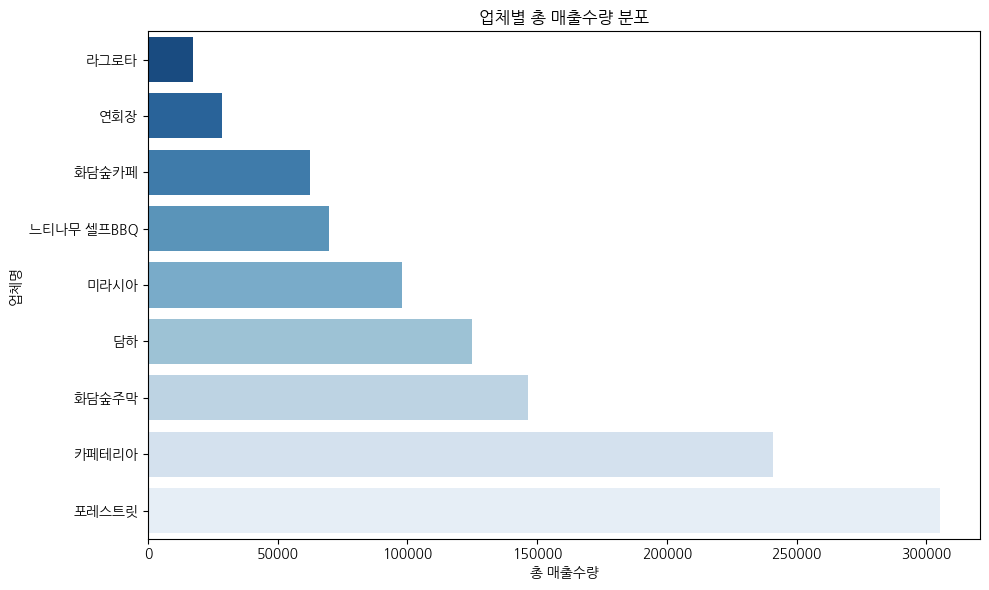

In [7]:
# ============================================
# 업체별 매출수량(판매량) 분포
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 설정 (한글 깨짐 방지)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 영업장명 / 메뉴명 분리
df[['영업장명', '메뉴명']] = df['영업장명_메뉴명'].str.split('_', n=1, expand=True)

# 2. 업체(영업장명)별 매출수량 합계 계산
sales_by_store = (
    df.groupby('영업장명', as_index=False)['매출수량']
    .sum()
    .sort_values(by='매출수량', ascending=True)
)

# 3. 시각화 (가로 막대그래프)
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_store, x='매출수량', y='영업장명', palette='Blues_r')
plt.title("업체별 총 매출수량 분포")
plt.xlabel("총 매출수량")
plt.ylabel("업체명")
plt.tight_layout()
plt.show()

그래프에서 ‘포레스트릿’, ‘카페테리아’, ‘화담숲주막’이 상위권을 차지하며 전체 매출의 큰 비중을 차지하고 있다. 이 세 업체는 지속적 수요가 발생하는 핵심 공급처(High-demand source)로 보여진다. 특히 ‘포레스트릿’의 매출이 타 업체 대비 두드러지게 높은 점은 제품군 집중도가 높다는 것을 의미한다.

#3. 군집화를 통한 파생변수 생성 (KMeans)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 수치형 컬럼만 추출 (매출수량만 있는 경우 대비)
num_cols = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

# KMeans 군집화
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

print(df[['영업일자', '매출수량', 'cluster']].head())

        영업일자  매출수량  cluster
0 2023-01-01     0        0
1 2023-01-02     0        0
2 2023-01-03     0        0
3 2023-01-04     0        0
4 2023-01-05     0        0


#4. GLM(일반화 선형모형) 월/요일 별 인과분석

In [9]:
import statsmodels.api as sm
from patsy import dmatrices

# y: 매출수량 / X: 나머지
formula = '매출수량 ~ 월 + C(요일) + C(cluster)' #자동 더미변수(dummy variable)변환
y, X = dmatrices(formula, data=df, return_type='dataframe')

glm_model = sm.GLM(y, X, family=sm.families.Gaussian()) #분포종류(family) Gaussian 선택
glm_results = glm_model.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   매출수량   No. Observations:               102676
Model:                            GLM   Df Residuals:                   102666
Model Family:                Gaussian   Df Model:                            9
Link Function:               Identity   Scale:                          743.30
Method:                          IRLS   Log-Likelihood:            -4.8509e+05
Date:                Sun, 26 Oct 2025   Deviance:                   7.6312e+07
Time:                        10:14:53   Pearson chi2:                 7.63e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7435
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.9391      0

분석 결과, 매출수량은 요일, 클러스터, 월 변수에 따라 뚜렷한 차이를 보이는 것으로 나타났다. 특히 토요일의 회귀계수(1.6013)가 유의하게 양(+)의 값을 가지며, 이는 주말에 매출이 증가하는 경향을 의미한다. 반면 월요일(-3.1801), 화요일(-2.5452), 수요일(-2.5590), 목요일(-1.4344)은 모두 음(-)의 영향을 보여 평일 매출이 상대적으로 낮음을 알 수 있다.

이러한 패턴은 실제 소비 행태에서 주말 외식·여가 수요 증가와 밀접하게 연관된 것으로 해석된다. 또한 요일별 유의확률(P>|z|)이 대부분 0.000으로 매우 낮아, 통계적으로도 요일이 매출 변동에 유의한 영향을 미친다고 볼 수 있다.

한편 cluster 변수 중 ‘cluster 1’의 계수(332.7491)가 압도적으로 높게 나타났으며, 이는 특정 군집(매장군 혹은 메뉴군)이 전체 매출을 견인하고 있음을 의미한다.그리고 Pseudo R² = 0.7435로 높은 설명력을 보이며, 매출수량이 주말 중심, 특정 클러스터 중심으로 집중되는 구조적 특성을 보여준다.

#5. sklearn 기반 회귀모델 3개 학습

In [10]:
# ===============================================
# 회귀모델 학습 (Ridge, RandomForest, GradientBoosting)
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# 1. 데이터 준비
# ----------------------------
X = df[['월', '요일', 'cluster', '영업장명', '메뉴명']].copy()
y = df['매출수량']

# 더미 변수 변환
X = pd.get_dummies(X, drop_first=True)

# ----------------------------
# 2. Train/Test 분할
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. 스케일링 (Ridge 전용)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 4. 모델 정의
# ----------------------------
models = {
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

# ----------------------------
# 5. 학습 및 평가
# ----------------------------
results = []

for name, model in models.items():
    print(f"\n▶ {name} 모델 학습 시작")

    if name == "Ridge":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    # 평가 지표 계산 (버전 무관하게 안전하게)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds) ** 0.5  # <-- 직접 제곱근 취해서 RMSE 계산
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])

# ----------------------------
# 6. 결과 요약
# ----------------------------
results_df = pd.DataFrame(results, columns=["모델", "MAE", "RMSE", "R²"])
print("\n[모델별 성능 비교]")
print(results_df)



▶ Ridge 모델 학습 시작

▶ RandomForest 모델 학습 시작

▶ GradientBoosting 모델 학습 시작

[모델별 성능 비교]
                 모델        MAE       RMSE        R²
0             Ridge  14.380905  35.726113  0.213452
1      RandomForest   5.969554  19.192514  0.773004
2  GradientBoosting   7.903561  20.211208  0.748268


모델별 성능 비교 결과를 보면, 비선형 트리 기반 모델(RandomForest, GradientBoosting) 이 선형모델(Ridge)에 비해 월등히 높은 예측 성능을 보였다.
Ridge 모델의 R²는 0.213으로 설명력이 낮고 MAE와 RMSE도 상대적으로 큰 편이지만, RandomForest는 R² 0.773으로 매우 높은 설명력을 보이며 평균오차(MAE)도 5.97로 가장 낮다.

이는 데이터 내 변수 간 비선형적 상호작용과 복잡한 패턴을 트리 모델이 효과적으로 포착했다는 것을 의미한다. GradientBoosting 역시 R² 0.748로 준수한 성능을 보이지만, RandomForest가 다소 더 안정적인 예측력을 보였다. 이러한 결과는 매출수량 예측에 있어 단순한 선형 관계보다는, 요일·클러스터·메뉴명·매장명 등 변수 간의 복합적 구조와 상호작용이 중요한 요인으로 작용한다.

#6. Stacking - XGBoost

In [ ]:
print(X_train.shape)

(82140, 191)


In [ ]:
list(X_train.columns)

['월',
 'cluster',
 '요일_Monday',
 '요일_Saturday',
 '요일_Sunday',
 '요일_Thursday',
 '요일_Tuesday',
 '요일_Wednesday',
 '영업장명_담하',
 '영업장명_라그로타',
 '영업장명_미라시아',
 '영업장명_연회장',
 '영업장명_카페테리아',
 '영업장명_포레스트릿',
 '영업장명_화담숲주막',
 '영업장명_화담숲카페',
 '메뉴명_(단체) 생목살 김치전골 2.0',
 '메뉴명_(단체) 은이버섯 갈비탕',
 '메뉴명_(단체) 한우 우거지 국밥',
 '메뉴명_(단체) 황태해장국 3/27까지',
 '메뉴명_(단체)브런치주중 36,000',
 '메뉴명_(오븐) 하와이안 쉬림프 피자',
 '메뉴명_(정식) 된장찌개',
 '메뉴명_(정식) 물냉면 ',
 '메뉴명_(정식) 비빔냉면',
 '메뉴명_(화덕) 불고기 페퍼로니 반반피자',
 '메뉴명_(후식) 된장찌개',
 '메뉴명_(후식) 물냉면',
 '메뉴명_(후식) 비빔냉면',
 '메뉴명_1인 수저세트',
 '메뉴명_AUS (200g)',
 '메뉴명_BBQ Platter',
 '메뉴명_BBQ 고기추가',
 '메뉴명_BBQ55(단체)',
 '메뉴명_Cass Beer',
 '메뉴명_Conference L1',
 '메뉴명_Conference L2',
 '메뉴명_Conference L3',
 '메뉴명_Conference M1',
 '메뉴명_Conference M8',
 '메뉴명_Conference M9',
 '메뉴명_Convention Hall',
 '메뉴명_Cookie Platter',
 '메뉴명_G-Charge(3)',
 '메뉴명_Gls.Sileni',
 '메뉴명_Gls.미션 서드',
 '메뉴명_Grand Ballroom',
 '메뉴명_OPUS 2',
 '메뉴명_Open Food',
 '메뉴명_Regular Coffee',
 '메뉴명_갑오징어 비빔밥',
 '메뉴명_갱시기',
 '메뉴명_골뱅이무침',
 '메뉴명_공깃밥',
 '메뉴명_공깃밥(추가)',
 '

In [11]:
# --------------------------------------------
# 컬럼명 정제 (특수문자 제거)
# --------------------------------------------
def clean_columns(df):
    df.columns = (
        df.columns
        .str.replace(r'[\s\(\)\[\]\{\}~!@#$%^&*+=/\\:;\"\'<>?,.|]', '_', regex=True)
        .str.replace(r'_+', '_', regex=True)
        .str.strip('_')
    )
    return df

X_train = clean_columns(X_train)
X_test = clean_columns(X_test)

# --------------------------------------------
# 🔹 중복 컬럼 제거 (가장 안전한 방법)
# --------------------------------------------
dup_cols = X_train.columns[X_train.columns.duplicated()]
if len(dup_cols) > 0:
    print(f"중복 컬럼 {len(dup_cols)}개 발견 → 제거 진행")
    X_train = X_train.loc[:, ~X_train.columns.duplicated()]
    X_test = X_test.loc[:, ~X_test.columns.duplicated()]
else:
    print("중복 컬럼 없음")


중복 컬럼 3개 발견 → 제거 진행


In [12]:
# ===============================================
# LightGBM 기반 Stacking 모델 학습
# ===============================================

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# 1차 LightGBM으로 피처 중요도 산출
print("▶ 1차 LightGBM 학습 중 (피처 중요도 산출)...")

temp_model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
temp_model.fit(X_train, y_train)

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': temp_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 중요도 하위 30% 제거
threshold = int(len(feat_imp) * 0.3)
low_features = feat_imp.tail(threshold)['feature'].tolist()

X_train_reduced = X_train.drop(columns=low_features)
X_test_reduced = X_test.drop(columns=low_features)

print(f"제거된 피처 수: {len(low_features)}개")
print(f"최종 피처 수: {X_train_reduced.shape[1]}개")

# Base 모델 (RandomForest + GradientBoosting)
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Meta 모델 (LightGBM)
meta_model = LGBMRegressor(
    n_estimators=80,
    learning_rate=0.15,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Stacking 구성
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,
    n_jobs=-1
)

# 학습 및 예측
print("\n▶ LightGBM 기반 Stacking 모델 학습 중...")
stack_model.fit(X_train_reduced, y_train)
stack_preds = stack_model.predict(X_test_reduced)

# 성능 평가
mae = mean_absolute_error(y_test, stack_preds)
rmse = mean_squared_error(y_test, stack_preds) ** 0.5
r2 = r2_score(y_test, stack_preds)

print("\n[LightGBM Stacking 결과]")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

▶ 1차 LightGBM 학습 중 (피처 중요도 산출)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 82140, number of used features: 188
[LightGBM] [Info] Start training from score 10.676406
제거된 피처 수: 56개
최종 피처 수: 132개

▶ LightGBM 기반 Stacking 모델 학습 중...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 82140, number of used features: 2
[LightGBM] [Info] Start training from score 10.676406

[LightGBM Stacking 결과]
MAE : 6.3036
RMSE: 18.7383
R²  : 0.7836


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM 기반 스태킹 결과, R²는 0.7836으로 전체 매출수량 변동의 약 78%를 설명하고 있다. MAE(평균 절대 오차)는 6.30, RMSE(평균 제곱근 오차)는 18.74로 낮은 편이다. LightGBM이 메타모델로 사용하며 베이스 모델들의 장점을 효과적으로 결합해 과적합을 줄이고, 데이터의 비선형적 관계를 정교하게 반영한 것으로 해석된다.

또한 학습 과정에서 중복 피처 3개 제거 및 중요도 하위 30% 피처 56개 제거 후 132개 주요 변수만 사용했음에도 성능이 향상된 점은, 불필요한 변수를 줄이는 것이 오히려 모델의 안정성과 해석력을 높였다.

#7. Feature Importance (예측 중요도)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 82140, number of used features: 132
[LightGBM] [Info] Start training from score 10.676406


/tmp/ipython-input-3036408015.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(20), x='Importance', y='Feature', palette='viridis')


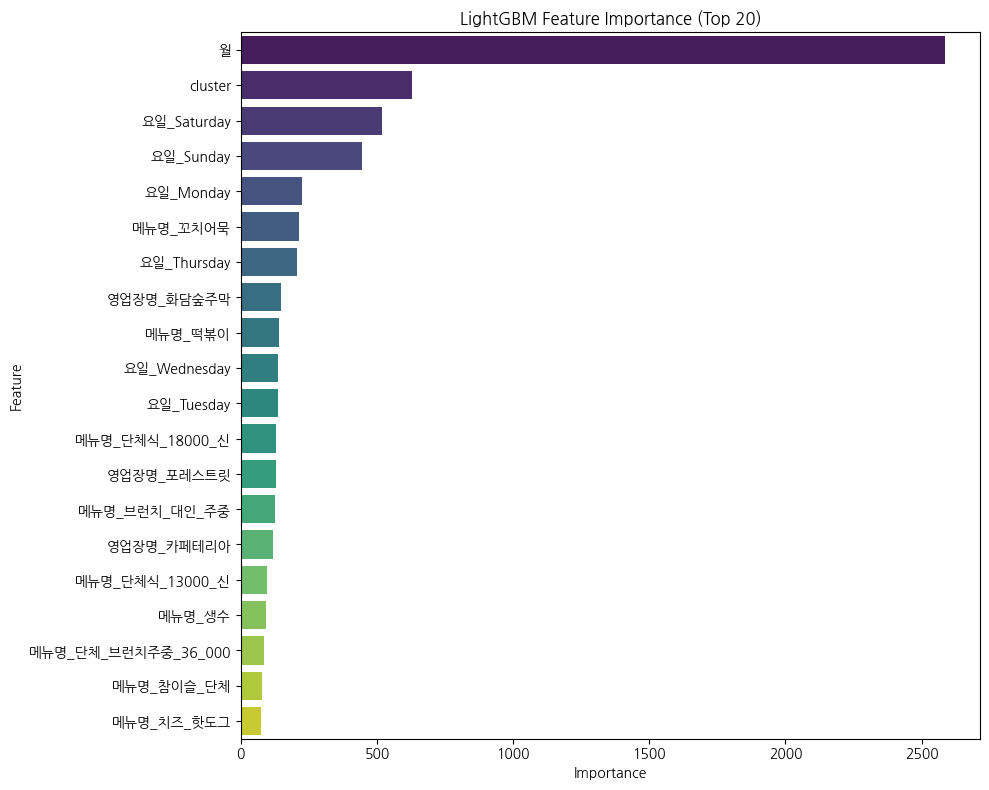

,Feature,Importance
0,월,2585
1,cluster,628
3,요일_Saturday,517
4,요일_Sunday,445
2,요일_Monday,223
...,...,...
50,메뉴명_갑오징어_비빔밥,0
48,메뉴명_Open_Food,0
99,메뉴명_알리오_에_올리오,0
94,메뉴명_시저_샐러드,0


In [17]:
# ===============================================
# LightGBM 단일모델 Feature Importance (y값에 대한 변수 중요도)
# ===============================================

from lightgbm import LGBMRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LightGBM 단일모델 재학습
lgb_model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.08,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train_reduced, y_train)

# Feature Importance 추출
feat_imp = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10,8))
sns.barplot(data=feat_imp.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("LightGBM Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 전체 중요도 표 확인
display(feat_imp)


해당 LightGBM 변수 중요도 그래프를 보면, 매출수량(y) 예측에 가장 큰 영향을 미친 변수는 ‘월’과 ‘cluster’임을 확인할 수 있다.
‘월’ 변수의 중요도가 압도적으로 높게 나타난 것은, 월별 매출 변화가 뚜렷하며 계절성(seasonality)이나 프로모션 시기 등의 영향이 강하게 작용함을 의미한다. 즉, 연중 특정 시기에 매출이 집중되거나 감소하는 패턴이 모델의 예측에 결정적인 요인으로 작용하고 있다.

또한 요일 '토','일','월' 변수들도 상위권에 위치하며, 주말 변수의 중요도가 높게 나타나는 것은 주말 중심 매출 집중 경향과 일치한다. 그리고 특정 메뉴들의 상위권 위치는 소비자들의 인기메뉴와 매장의 매출 기여도가 큰 것을 의미한다.

종합적으로 본 모델은 시간(월·요일) 요인 + 구조적 요인(cluster) + 개별 수요 특성(메뉴·매장) 을 균형 있게 반영하여 매출수량을 설명하고 있으며, 이는 향후 수요 예측 및 재고 전략 수립 시 주요 인사이트로 활용 가능하다.